### Story telling data visualization on exchange rate
The dataset used here describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union. This was built by Daria Chemkaeva. Data set can be found [here](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020)

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings


In [2]:
# Read and open the data set
data=pd.read_csv('euro-daily-hist_1999_2021.csv')
data.shape
# The dataset has 5878 rows and 45 columns

(5878, 45)

In [3]:
data.duplicated().sum() # There is no duplicated value in this data set.
data.isnull().sum() # There are some missing values in some columns eg: Australian, Slovenian, Slovak, New Taiwan, crypto, Algerian, Greek, Estonian, Latvian, Lithunian,Moroccan, Maltese.
# I am not removing the rows or column which have null values because we can loose valuable information.

Period\Unit:                   0
[Argentine peso ]            495
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3532
[Czech koruna ]                0
[Danish krone ]                0
[Algerian dinar ]            495
[Estonian kroon ]           2748
[UK pound sterling ]           0
[Greek drachma ]            5358
[Hong Kong dollar ]            0
[Croatian kuna ]             268
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         1719
[Latvian lats ]             1974
[Moroccan dirham ]           495
[Maltese lira ]             3532
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian

#### Data Cleaning

In [4]:
# Rename the column name. [Us dollar] to Us_dollar and Period/unit to Time.
#After that convert the the column Time to datetime format
#Reset the indeax; drop the initial index
#Sort the Time column in ascending order
data.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
data['Time'] = pd.to_datetime(data['Time'])
data.sort_values('Time', inplace=True)
data.reset_index(drop=True, inplace=True)
#data

In [5]:
# Isolate Time & US_dollar column and save them to a new column euro_to_dollar
euro_to_dollar=data[['Time','US_dollar']]
euro_to_dollar['US_dollar'].value_counts() # Calculate the unique value of different dollar rate

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2804     1
1.2774     1
1.2814     1
1.2886     1
1.1711     1
Name: US_dollar, Length: 3576, dtype: int64

In [6]:
# From the above output it can be seen that there 62 counts on '-' which is not a dollar value. Mistakenly there were some rows which have this punctuation.
#Drop the rows in 'US_dollar' column which have '-' and convert this cloumn to float type

euro_to_dollar=euro_to_dollar[euro_to_dollar['US_dollar']!= '-']
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar
euro_to_dollar.info()
euro_to_dollar.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5816 non-null   datetime64[ns]
 1   US_dollar  5816 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.3 KB


(5816, 2)

#### Visualize the evolution of the euro-dollar exchange rate.

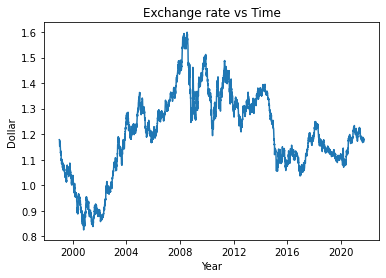

In [7]:
# Plot a time series line graph
%matplotlib inline
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.xlabel('Year')
plt.ylabel('Dollar')
plt.title('Exchange rate vs Time')
plt.show()


##### From the above graph, its clear that there is a pick in exchange rate in the year of 2008. The graph only shows ups and downs day by day & the rate only shows clear upward or downward trends in the longer run (months or years).
If we want to hide the fluctuation of day by day, we can use rolling mean which is also known as moving average.

#### Rolling Mean

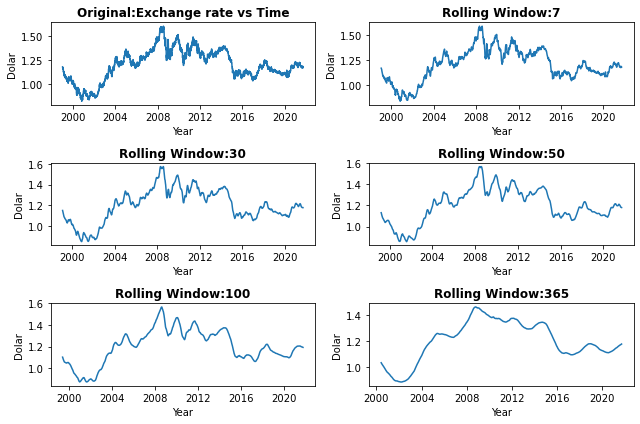

In [8]:
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original:Exchange rate vs Time', weight='bold')
plt.xlabel('Year')
plt.ylabel('Dolar')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]): #7=1 week, 30=1 month, 365=1 year
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    plt.xlabel('Year')
    plt.ylabel('Dolar')
    
plt.tight_layout() 
plt.show()

In [9]:
# Add a new column to the euro_to_dollar dataframe and take moving average for 1 month
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
#print(euro_to_dollar)

### Make a story through the visualization
I am going to compare the dataset in two ways.
At first I will show how the euro-dollar rate changed during the 2007-2008's financial crisis and then will see how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)).

In [10]:
#Financial crisis during 2006-2009
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]

#Financial crisis during 2007-2008
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]
#print(financial_crisis)
#print(financial_crisis_7_8)

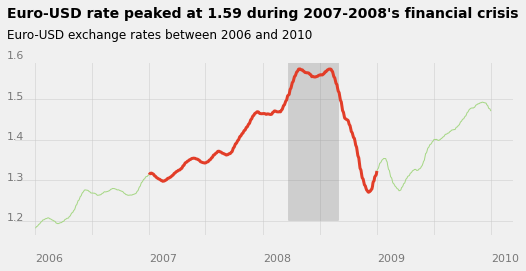

In [11]:
# Plot the graph
style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')
ax.axvspan(xmin=13960.0, xmax=14120.0,ymin=.09,
           alpha=0.3, color='grey')
  
ax.set_xticklabels([])
ax.set_yticklabels([]) 

x = 13150 # get it from ax.set_xticks()
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.1, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.2 # get it from ax.set_yticks()
for rate in ['1.2', '1.3', '1.4', '1.5','1.6']:
    ax.text(13060, y, rate, alpha=0.5, fontsize=11)
    y += 0.1
    
ax.text(13060, 1.7, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')  
ax.text(13060.0, 1.65, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)
ax.grid(alpha=0.5) 
plt.show()

##### From the above figure, it can be said that the currency rate was peaked only during 2007-2008 otherwise in most of the year it was low and it started to go to peak again in 2010

Now let's see how the exchange rate has been changed during different presidency time in US

In [12]:
# Let's make one for all together and then individually
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

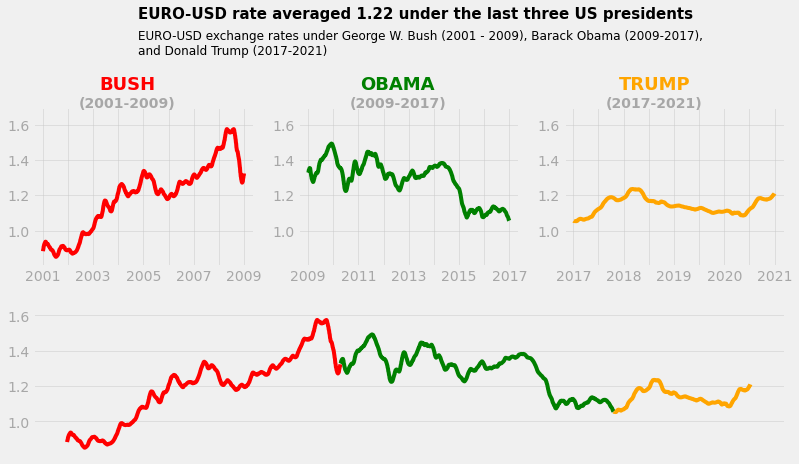

In [13]:
warnings.filterwarnings("ignore")

style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)   

# Plot the graph when the president was Bush    
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='r')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(12150.0, 1.8, 'BUSH', fontsize=18, weight='bold',
        color='r')
ax1.text(11850.0, 1.7, '(2001-2009)', weight='bold',
        alpha=0.3)    

# Plot the graph when the president was Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='g')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(15000.0, 1.8, 'OBAMA', fontsize=18, weight='bold',
        color='g')
ax2.text(14850.0, 1.7, '(2009-2017)', weight='bold',
         alpha=0.3)
# Plot the graph when the president was Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#ffa500')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17500.0, 1.8, 'TRUMP', fontsize=18, weight='bold',
        color='#ffa500')
ax3.text(17400.0, 1.7, '(2017-2021)', weight='bold',
         alpha=0.3)

#Plot a graph all together
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='r')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='g')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#ffa500')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(12700.0, 2.2, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=15, weight='bold')
ax1.text(12700.0, 2, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=12)
plt.show()



#### From the above graph, it can be clearly stated that during the last year presidency of Bush the excgange rate was high (around 1.59 in the year of 2008) and in the presidency time of Trump, it was worse. Though there is no peak on the exchange rate when Obama was president, it was stable but suddenly decreasing in the last time of presidency.